# CSC271H1 Week 5 Tutorial: Data Analysis and Visualization

## Goals of this tutorial:
- Practice conducting data analysis using pandas.
- Practice data visualization using matplotlib.

In the previous tutorial, we loaded and cleaned a dataset on Canadian rental housing costs. In this tutorial, we will again look at this dataset, this time using the `pandas` and `matplotlib` libraries to manipulate, visualize, and ultimately extract insights from the data. 

**We are specifically going to be exploring how rent in Ontario related to unit type, location, and time (Jan 2024 to Jan 2025)**.

**Be sure to properly label and display any plots you are asked to code**

<div class="alert alert-block alert-danger">
 <b>Important</b>: the autotesting will be inspecting the variables you are asked to create and their values, so be sure to use the variable names specified.
</div>

## Task 0: Load, clean, and subset data

Run the code below to load the housing costs dataset and apply the cleaning steps from the previous tutorial.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Canadian_rental_costs.csv') 

cols_to_drop = ['STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'Estimates',
                 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID']
df = df.drop(columns=cols_to_drop) 

medians_by_type = df.groupby('Rental unit type')['VALUE'].transform('median')
df['VALUE'] = df['VALUE'].fillna(medians_by_type)

df['REF_DATE'] = pd.to_datetime(df['REF_DATE']) 
df['YEAR'] = df['REF_DATE'].dt.year 

df = df.rename(columns={'VALUE': 'Monthly Rent'})

df['Rental unit type'] = df['Rental unit type'].str.removeprefix('Apartment - ')

df.head()

,REF_DATE,GEO,DGUID,Rental unit type,VECTOR,COORDINATE,Monthly Rent,YEAR
0,2024-01-01,"St. John's, Census metropolitan area (CMA)",2021S0503001,1 bedroom,v1675424962,1.2.1,1150.0,2024
1,2024-04-01,"St. John's, Census metropolitan area (CMA)",2021S0503001,1 bedroom,v1675424962,1.2.1,1050.0,2024
2,2024-07-01,"St. John's, Census metropolitan area (CMA)",2021S0503001,1 bedroom,v1675424962,1.2.1,1200.0,2024
3,2024-10-01,"St. John's, Census metropolitan area (CMA)",2021S0503001,1 bedroom,v1675424962,1.2.1,1230.0,2024
4,2025-01-01,"St. John's, Census metropolitan area (CMA)",2021S0503001,1 bedroom,v1675424962,1.2.1,1210.0,2025


Since we are going to be exploring how rent relates to location, unit type, and time, we only need those columns which are relevant: `REF_DATE`, `GEO`, `Rental unit type`, `Monthly Rent`. We'll remove the other columns and also some extra text from the location names.

Run the below code to select just the necessary columns from `df` and remove the extra location text.

In [2]:
df = df[['REF_DATE', 'GEO', 'Rental unit type', 'Monthly Rent']] 

# Remove extra text from location names
df['GEO'] = df['GEO'].str.split(',').str[0] 
df.head()

,REF_DATE,GEO,Rental unit type,Monthly Rent
0,2024-01-01,St. John's,1 bedroom,1150.0
1,2024-04-01,St. John's,1 bedroom,1050.0
2,2024-07-01,St. John's,1 bedroom,1200.0
3,2024-10-01,St. John's,1 bedroom,1230.0
4,2025-01-01,St. John's,1 bedroom,1210.0


Lastly, we are going to focus only on Ontario cities. Run the code below to use the `isin` method to select only DataFrame entries which have an item from `ontario_cities` in their 'GEO' column.

In [48]:
ontario_cities = ['Barrie',
                  'Belleville - Quinte West',
                  'Brantford',
                  'Greater Sudbury',
                  'Guelph',
                  'Hamilton',
                  'Kingston',
                  'Kitchener - Cambridge - Waterloo',
                  'London',
                  'Oshawa',
                  'Ottawa - Gatineau (Ontario part)',
                  'Peterborough',
                  'St. Catharines - Niagara',
                  'Thunder Bay',
                  'Toronto',
                  'Windsor']

ontario_df = df[df['GEO'].isin(ontario_cities)]

ontario_df.head(20)



,REF_DATE,GEO,Rental unit type,Monthly Rent
180,2024-01-01,Barrie,1 bedroom,1840.0
181,2024-04-01,Barrie,1 bedroom,1740.0
182,2024-07-01,Barrie,1 bedroom,1780.0
183,2024-10-01,Barrie,1 bedroom,1810.0
184,2025-01-01,Barrie,1 bedroom,1800.0
185,2024-01-01,Barrie,2 bedrooms,2240.0
186,2024-04-01,Barrie,2 bedrooms,2080.0
187,2024-07-01,Barrie,2 bedrooms,2050.0
188,2024-10-01,Barrie,2 bedrooms,2050.0
189,2025-01-01,Barrie,2 bedrooms,2120.0


## Task 1: Analyze the distribution of rent prices in Ontario

Now that we have filtered our dataset to just the observations relevant to us, let's analyze and visualize it to understand what information it can tell us.

### A: Find mean and median rent price

<div class="alert alert-block alert-success">
Fill in the cell below with code to create variables <code>average_monthly_rent</code> and <code>median_monthly_rent</code> that refer to the mean and median monthly rent prices in Ontario using the <code>ontario_df</code> data.
</div>

In [4]:
# TODO
average_monthly_rent = ontario_df['Monthly Rent'].mean() 
median_monthly_rent = ontario_df['Monthly Rent'].median()

print(f'Average monthly rent: ${average_monthly_rent}')
print(f'Median monthly rent: ${median_monthly_rent}')

Average monthly rent: $1518.3333333333333
Median monthly rent: $1695.0


### B: Plot distribution of rent prices

We will use a histogram to plot the monthly rents, since it will show us how often the rent is observed within different price intervals. This will let us see if rents cluster at a certain value or are evenly distributed, and if there are multiple clusters of rent prices or just one.

<div class="alert alert-block alert-success">
<p>
Create a variable named <code>rent_histogram</code> that refers to a histogram that displays the distribution of monthly rents in <code>ontario_df</code>.
</p>

<p>For the purpose of autograding:</p>

<ul>
  <li>Use 50 bins</li>
  <li>Give the plot the title <code>Distribution of monthly rents in Ontario, 2024-25</code></li>
  <li>Give the x-axis the label <code>Monthly Rent ($)</code></li>
</ul>

</div>

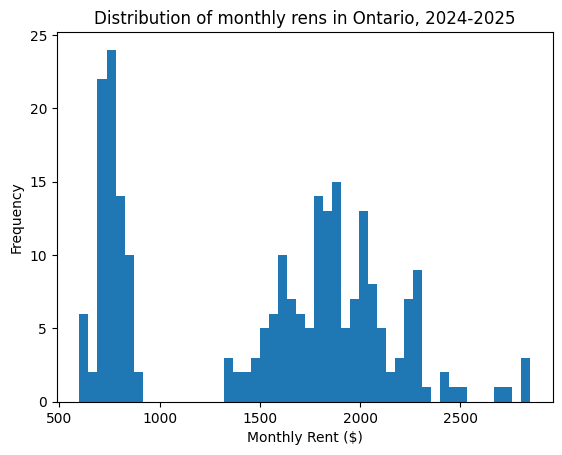

In [44]:
fig = plt.figure() # Keep this line of code here

# TODO
rent_histogram = ontario_df['Monthly Rent'].plot(kind = 'hist',
                                                 bins = 50,
                                                 title = 'Distribution of monthly rens in Ontario, 2024-2025',
                                                 xlabel = 'Monthly Rent ($)')

## Task 2: Analyze rent by unit type with boxplot

You may have noticed in your plot that the distribution of rent prices has multiple peaks. A potential explanation for this is that rent prices are very different for different unit types. We can explore whether this is true using another plot that allows us to compare the distributions of multiple groups of data. One option for this is a boxplot.

<div class="alert alert-block alert-success">
<p>
Create a variable <code>unit_boxplot</code> that refers to a boxplot of rent prices observed in Ontario for each unit type.
Three boxes should be displayed in the plot, one for each unit type.
</p>

<p>For the purpose of autograding:</p>

<ul>
  <li>Give the x-axis the label <code>Unit Type</code></li>
  <li>Give the y-axis the label <code>Monthly Rent ($)</code></li>  
</ul>

<p>
Use DataFrame's <code>boxplot</code> method:
</p>

<p>
<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html">
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
</a>
</p>

</div>

<Figure size 640x480 with 0 Axes>

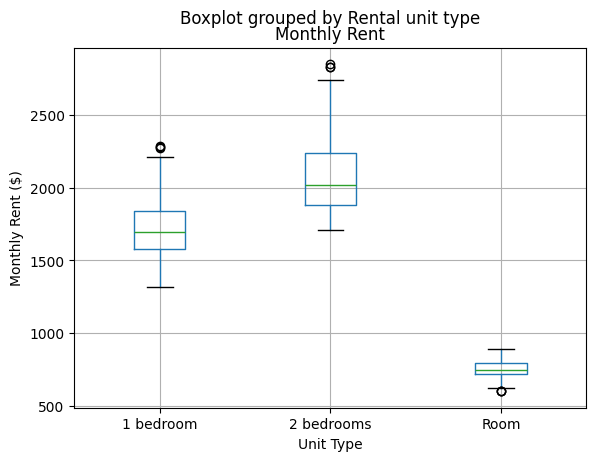

In [55]:
fig = plt.figure() # Keep this line of code here

# TODO
unit_boxplot = ontario_df.boxplot(column = 'Monthly Rent',
                                  by = 'Rental unit type',
                                  xlabel = 'Unit Type',
                                  ylabel = 'Monthly Rent ($)')

Some questions to consider! Based on your plot, consider what you have learned about how rent varies by unit type. Which units are the most expensive? How does the range of rents vary by type? Do the ranges of rents overlap for any of the types? 

## Task 3: Analyze rent by Ontario city

### Compare rent prices between cities with a bar plot

It is much easier to understand the magnitude of difference between values using a plot rather than just looking at a list of numbers. A bar plot is useful for this when you have multiple values you want to compare, each with a distinct label.

<div class="alert alert-block alert-success">
In the cell below, write code to create a variable <code>city_bar</code> that refers to a bar plot with the average rent price (averaged over all dates and unit types) for each Ontario city. The bars should be in ascending order along the x-axis (least expensive cities first to most expensive cities last)

<p>For the purpose of autograding:</p>

<ul>
  <li>Set the title to <code>Average Monthly Rent by Location</code</li>
  <li>Set the bar plot size to 8 by 6.</li>
  <li>Set the x-axis label to <code>Location</code>.</li>
  <li>Set the y-axis label to <code>Rent ($)</code></li>
</ul>
</div>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '405'),
  Text(1, 0, '406'),
  Text(2, 0, '407'),
  Text(3, 0, '408'),
  Text(4, 0, '409'),
  Text(5, 0, '410'),
  Text(6, 0, '411'),
  Text(7, 0, '412'),
  Text(8, 0, '413'),
  Text(9, 0, '414'),
  Text(10, 0, '415'),
  Text(11, 0, '416'),
  Text(12, 0, '417'),
  Text(13, 0, '418'),
  Text(14, 0, '419')])

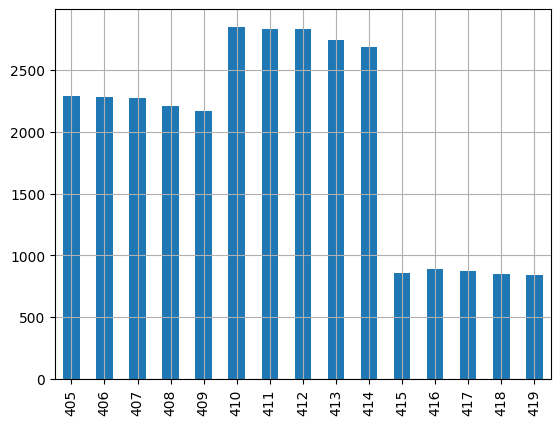

In [59]:
fig = plt.figure() # Keep this line of code here

# TODO
city_bar = ontario_df.groupby('GEO')['Monthly Rent'].plot(kind = 'bar')

plt.grid(True)
plt.xticks(rotation=90)

## Final Task: Show your TA and Submit to MarkUs

If you have not already done so, make sure your TA has recorded your attendance.

Submit your completed `w05_tutorial.ipynb` file to [Markus](https://markus.teach.cs.toronto.edu/markus/courses/128) and run the tests.